# Clase 4: Datos Espaciales II

En este espacio trabajaremos con SpatioTemporal Assets Catalogs (STAC).

## ¿Qué es STAC?

STAC es una especificación para indexar datos geoespaciales a través de un estándar común (ver [https://stacspec.org/en](https://stacspec.org/en)).

Existen tres objetos importantes en STAC:

- **Catálogo STAC**: Proporciona una estructura JSON que define *STAC Items* y/o *STAC Collections*.
- **Colección STAC**: Proporciona una extensión de *STAC Items* que comparten las mismas propiedades.
- **Item STAC**: Unidad central de la especificación. Describe una característica GeoJSON con propiedades.
- **Activo STAC**: Subdivisión de un **STAC Item** que proporciona información y datos para el mismo GeoJSON.

Por ejemplo, una estructura de Catálogo STAC se puede ver de la siguiente manera:

```
STAC Catalog
├─ STAC Collection 1
├─ STAC Collection 2
│  ├─ STAC Item 1
│  │  ├─ STAC Asset 1
│  │  ├─ STAC Asset 2
│  │  ├─ STAC Asset 3
│  ├─ STAC Item 2
│  │  ├─ STAC Asset 1
│  │  ├─ STAC Asset 2
│  ├─ STAC Item 3
├─ STAC Collection 3
│  ├─ STAC Item 1
│  ├─ STAC Item 2
│  │  ├─ STAC Asset 1
│  │  ├─ STAC Asset 2
```

Todos los catálogos STAC están aquí: [https://stacindex.org/catalogs](https://stacindex.org/catalogs)

#https://www.youtube.com/watch?v=byO0ABXFI4I
#https://www.youtube.com/watch?v=A6947RSxUxI

## Antes de empezar

Instala los paquetes necesarios:

In [1]:
!pip install earthengine-api eerepr odc-stac planetary_computer pystac_client requests tqdm xarray zarr

     -------------------------------------- 246.0/246.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached eerepr-0.0.4-py3-none-any.whl (9.7 kB)
     ---------------------------------------- 55.9/55.9 kB 3.0 MB/s eta 0:00:00
  Using cached pystac_client-0.6.1-py3-none-any.whl (30 kB)
     -------------------------------------- 203.3/203.3 kB 6.2 MB/s eta 0:00:00
  Using cached google_cloud_storage-2.8.0-py2.py3-none-any.whl (113 kB)
     ---------------------------------------- 11.2/11.2 MB 6.1 MB/s eta 0:00:00
     -------------------------------------- 178.2/178.2 kB 5.2 MB/s eta 0:00:00
  Using cached google_auth_httplib2-0.1.0-py2.py3-none-any.whl (9.3 kB)
  Using cached httplib2-0.22.0-py3-none-any.whl (96 kB)
     ---------------------------------------- 1.2/1.2 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 114.4/114.4 kB 6.9 MB/s eta 0:00:00
     ---------------------

## Catálogos STAC Públicos

Usamos `pystac_client` para acceder a catálogos STAC públicos.


In [2]:
from pystac_client import Client

Vamos a trabajar con el Catálogo STAC público de Element84 (Earth Search): [https://www.element84.com/earth-search/](https://www.element84.com/earth-search/)

Nota que necesitamos el endpoint de la API del Catálogo: [https://earth-search.aws.element84.com/v0](https://earth-search.aws.element84.com/v0)


In [3]:
client = Client.open("https://earth-search.aws.element84.com/v0")
print(f"{client.title}: {client.description}")

Earth Search: A STAC API of AWS Public Datasets powered by stac-server


Podemos ver la estructura JSON del Catálogo:

In [4]:
client.to_dict()

{'type': <STACObjectType.CATALOG: 'Catalog'>,
 'id': 'earth-search',
 'stac_version': '1.0.0',
 'description': 'A STAC API of AWS Public Datasets powered by stac-server',
 'links': [{'rel': <RelType.ROOT: 'root'>,
   'href': 'https://earth-search.aws.element84.com/v0',
   'type': <MediaType.JSON: 'application/json'>,
   'title': 'Earth Search'},
  {'rel': <RelType.SELF: 'self'>,
   'href': 'https://earth-search.aws.element84.com/v0',
   'type': <MediaType.JSON: 'application/json'>},
  {'rel': 'child',
   'href': 'https://earth-search.aws.element84.com/v0/collections/sentinel-s2-l2a'},
  {'rel': 'child',
   'href': 'https://earth-search.aws.element84.com/v0/collections/sentinel-s2-l1c'},
  {'rel': 'child',
   'href': 'https://earth-search.aws.element84.com/v0/collections/sentinel-s2-l2a-cogs'},
  {'rel': 'child',
   'href': 'https://earth-search.aws.element84.com/v0/collections/landsat-8-l1-c1'},
  {'rel': 'service-desc',
   'href': 'https://earth-search.aws.element84.com/v0/api',
   't

Podemos ver todas las colecciones del Catálogo:

In [5]:
collections = [collection for collection in client.get_collections()]
for idx, col in enumerate(collections):
    print(f"[{idx}] (id: {col.id}) {col.title}: {col.description}")

[0] (id: sentinel-s2-l2a) Sentinel 2 L2A: Sentinel-2a and Sentinel-2b imagery, processed to Level 2A (Surface Reflectance)
[1] (id: sentinel-s2-l1c) Sentinel 2 L1C: Sentinel-2a and Sentinel-2b imagery, processed to Level 1C (Top-Of-Atmosphere Geometrically Corrected)
[2] (id: sentinel-s2-l2a-cogs) Sentinel 2 L2A COGs: Sentinel-2a and Sentinel-2b imagery, processed to Level 2A (Surface Reflectance) and converted to Cloud-Optimized GeoTIFFs
[3] (id: landsat-8-l1-c1) Landsat-8 L1 Collection-1: Landat-8 L1 Collection-1 imagery radiometrically calibrated and orthorectified using gound points and Digital Elevation Model (DEM) data to correct relief displacement.


Nota que la Colección 3 (`sentinel-s2-l2a-cogs`) está en formato COG (Cloud Optimized GeoTIFF). El resto de las colecciones son archivos normales GeoTIFF.

Vamos a revisar la cobertura espaciotemporal para cada colección.

In [6]:
def print_spatiotemporal_coverage(collection):
    """Prints the spatial and temporal coverage of an ItemCollection object."""
    
    print(f"{'*'*20} {collection.title} {'*'*20}")
    print(f"Spatial coverage: {collection.extent.spatial.bboxes[0]}")
    t_coverage = collection.extent.temporal.intervals[0]
    print(f"Temporal coverage start: {t_coverage[0].strftime('%Y-%m-%d')}")
    if t_coverage[1] is not None:
        print(f"Temporal coverage start: {t_coverage[1].strftime('%Y-%m-%d')}")
    else:
        print("Temporal coverage end: Today")

In [7]:
for col in collections:
    print_spatiotemporal_coverage(col)

******************** Sentinel 2 L2A ********************
Spatial coverage: [-180, -90, 180, 90]
Temporal coverage start: 2015-06-27
Temporal coverage end: Today
******************** Sentinel 2 L1C ********************
Spatial coverage: [-180, -90, 180, 90]
Temporal coverage start: 2015-06-27
Temporal coverage end: Today
******************** Sentinel 2 L2A COGs ********************
Spatial coverage: [-180, -90, 180, 90]
Temporal coverage start: 2015-06-27
Temporal coverage end: Today
******************** Landsat-8 L1 Collection-1 ********************
Spatial coverage: [-180, -90, 180, 90]
Temporal coverage start: 2013-06-01
Temporal coverage end: Today


Primeros 10 items en la colección:

In [8]:
items = collections[0].get_items()
for idx, item in enumerate(items):
    print(f"[{idx}] {item.id}")
    if idx == 9:
        break

[0] S2A_58WEB_20230418_0_L2A
[1] S2A_57WXT_20230418_0_L2A
[2] S2A_58WDC_20230418_0_L2A
[3] S2A_58WFB_20230418_0_L2A
[4] S2A_59WMS_20230418_0_L2A
[5] S2A_58WEC_20230418_0_L2A
[6] S2A_57WXU_20230418_0_L2A
[7] S2A_58WFC_20230418_0_L2A
[8] S2A_58WDD_20230418_0_L2A
[9] S2A_59WMT_20230418_0_L2A


### Buscando Items

Podemos filtrar una colección por espacio y también por tiempo. Vamos a definir una geometría para nuestra búsqueda.

In [9]:
geom = {
    "type": "Point",
    "coordinates": [10.434102660958201, 51.08111585538142] # Hainich
}

Ahora podemos usar el endpoint para buscar en colecciones específicas dada una intersección con nuestra característica y el rango de fechas especificado.




In [10]:
search = client.search(
    collections = "sentinel-s2-l2a-cogs", # Public COGs
    intersects = geom,
    datetime = "2018-06-01/2018-06-30",
)

Traigamos todos los ítems:

In [11]:
items = list(search.get_all_items())
items

[<Item id=S2B_32UPB_20180629_0_L2A>,
 <Item id=S2B_32UNB_20180629_0_L2A>,
 <Item id=S2B_32UNB_20180626_0_L2A>,
 <Item id=S2B_32UPB_20180626_1_L2A>,
 <Item id=S2A_32UNB_20180624_0_L2A>,
 <Item id=S2A_32UPB_20180624_0_L2A>,
 <Item id=S2A_32UPB_20180621_0_L2A>,
 <Item id=S2A_32UNB_20180621_0_L2A>,
 <Item id=S2B_32UNB_20180619_0_L2A>,
 <Item id=S2B_32UPB_20180619_0_L2A>,
 <Item id=S2B_32UNB_20180616_0_L2A>,
 <Item id=S2B_32UPB_20180616_0_L2A>,
 <Item id=S2A_32UNB_20180614_0_L2A>,
 <Item id=S2A_32UPB_20180614_0_L2A>,
 <Item id=S2A_32UPB_20180611_1_L2A>,
 <Item id=S2A_32UNB_20180611_1_L2A>,
 <Item id=S2B_32UPB_20180609_0_L2A>,
 <Item id=S2B_32UNB_20180609_0_L2A>,
 <Item id=S2B_32UNB_20180606_0_L2A>,
 <Item id=S2B_32UPB_20180606_0_L2A>,
 <Item id=S2A_32UNB_20180604_0_L2A>,
 <Item id=S2A_32UPB_20180604_0_L2A>,
 <Item id=S2A_32UPB_20180601_0_L2A>,
 <Item id=S2A_32UNB_20180601_0_L2A>]

Imprime todas las propiedades de un Item. Es un GeoJSON Feature.


In [ ]:
items[0]

id: S2B_32UNB_20180629_0_L2A
"bbox: [8.99972656711245, 50.453532455660834, 10.579529328947972, 51.45117321354576]"
created: 2020-09-06T07:12:55.544Z
sentinel:product_id: S2B_MSIL2A_20180629T103019_N0208_R108_T32UNB_20180924T145004
sentinel:sequence: 0
view:off_nadir: 0
sentinel:valid_cloud_cover: True
platform: sentinel-2b
sentinel:utm_zone: 32
proj:epsg: 32632
sentinel:grid_square: NB


Obtén el Bounding Box.

In [ ]:
items[0].bbox

[8.99972656711245, 50.453532455660834, 10.579529328947972, 51.45117321354576]

Obtén la geometría.

In [ ]:
items[0].geometry

{'coordinates': [[[10.546422653359961, 50.453532455660834],
   [8.999732301034948, 50.46380739464256],
   [8.99972656711245, 51.45117321354576],
   [10.579529328947972, 51.440532370758774],
   [10.546422653359961, 50.453532455660834]]],
 'type': 'Polygon'}

Propiedades:

In [ ]:
items[0].properties

{'created': '2020-09-06T07:12:55.544Z',
 'sentinel:product_id': 'S2B_MSIL2A_20180629T103019_N0208_R108_T32UNB_20180924T145004',
 'sentinel:sequence': '0',
 'view:off_nadir': 0,
 'sentinel:valid_cloud_cover': True,
 'platform': 'sentinel-2b',
 'sentinel:utm_zone': 32,
 'proj:epsg': 32632,
 'sentinel:grid_square': 'NB',
 'datetime': '2018-06-29T10:30:21Z',
 'instruments': ['msi'],
 'constellation': 'sentinel-2',
 'eo:cloud_cover': 0.04,
 'gsd': 10,
 'sentinel:latitude_band': 'U',
 'data_coverage': 100,
 'updated': '2020-09-06T07:12:55.544Z',
 'sentinel:data_coverage': 100}

Ahora los assets (productos).

In [ ]:
items[0].assets

{'overview': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/U/NB/2018/6/S2B_32UNB_20180629_0_L2A/L2A_PVI.tif>,
 'thumbnail': <Asset href=https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/32/U/NB/2018/6/29/0/preview.jpg>,
 'metadata': <Asset href=https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/32/U/NB/2018/6/29/0/metadata.xml>,
 'B11': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/U/NB/2018/6/S2B_32UNB_20180629_0_L2A/B11.tif>,
 'B01': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/U/NB/2018/6/S2B_32UNB_20180629_0_L2A/B01.tif>,
 'B12': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/U/NB/2018/6/S2B_32UNB_20180629_0_L2A/B12.tif>,
 'B02': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/U/NB/2018/6/S2B_32UNB_20180629_0_L2A/B02.tif>,
 'B03': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.co

Ahora, el GeoJSON no puede darnos los datos de las imágenes. Pero nos puede dar la ubicación de los datos. Mira el siguiente ejemplo.


In [ ]:
items[0].assets['thumbnail'].href

'https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/32/U/NB/2018/6/29/0/preview.jpg'

Vamos a graficar la miniatura, que está incluida como un archivo JPG en los recursos del item.


In [ ]:
from PIL import Image
import requests

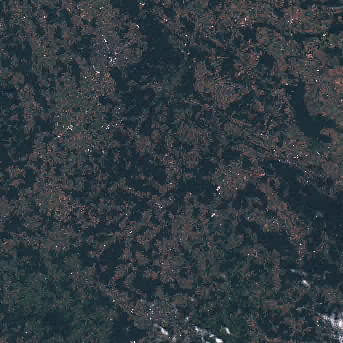

In [ ]:
Image.open(requests.get(items[0].assets['thumbnail'].href, stream=True).raw)

Nota que las bandas de la imagen se almacenan en un bucket de S3.


In [ ]:
items[0].assets['B08'].href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/32/U/NB/2018/6/S2B_32UNB_20180629_0_L2A/B08.tif'

Si lo necesitáramos, podríamos descargar un item completo:

In [ ]:
import os
from tqdm import tqdm

def download_asset(asset,path):
    """Downloads a STAC Asset."""
    
    url = asset.href
    filename = url.split("/")[-1]
    response = requests.get(url,stream=True)
    with open(f"{path}/{filename}", 'wb') as f:
        f.write(response.content)
        
def download_item(item):
    """Downloads a STAC Item."""
    
    if not os.path.exists(item.id):
        os.mkdir(item.id)
    for asset in tqdm(item.assets.keys()):
        download_asset(item.assets[asset],item.id) 

Se puede descargar un único item (esto puede tomar un tiempo, no ejecutar si no es necesario):


In [ ]:
# download_item(items[0])

Pero dado que estamos utilizando COGs, podemos solicitar los datos sin descargarlos.

Incluso podemos solicitar datos `parciales`.


In [ ]:
import odc.stac

Los Items se cargan como un `xarray.Dataset`, con cada Recurso como un `xarray.DataArray`. Podemos seleccionar los Recursos que necesitamos y también definir bloques para las dimensiones `[x, y, time]` si es necesario. El CRS y la resolución siempre deben estar definidos.

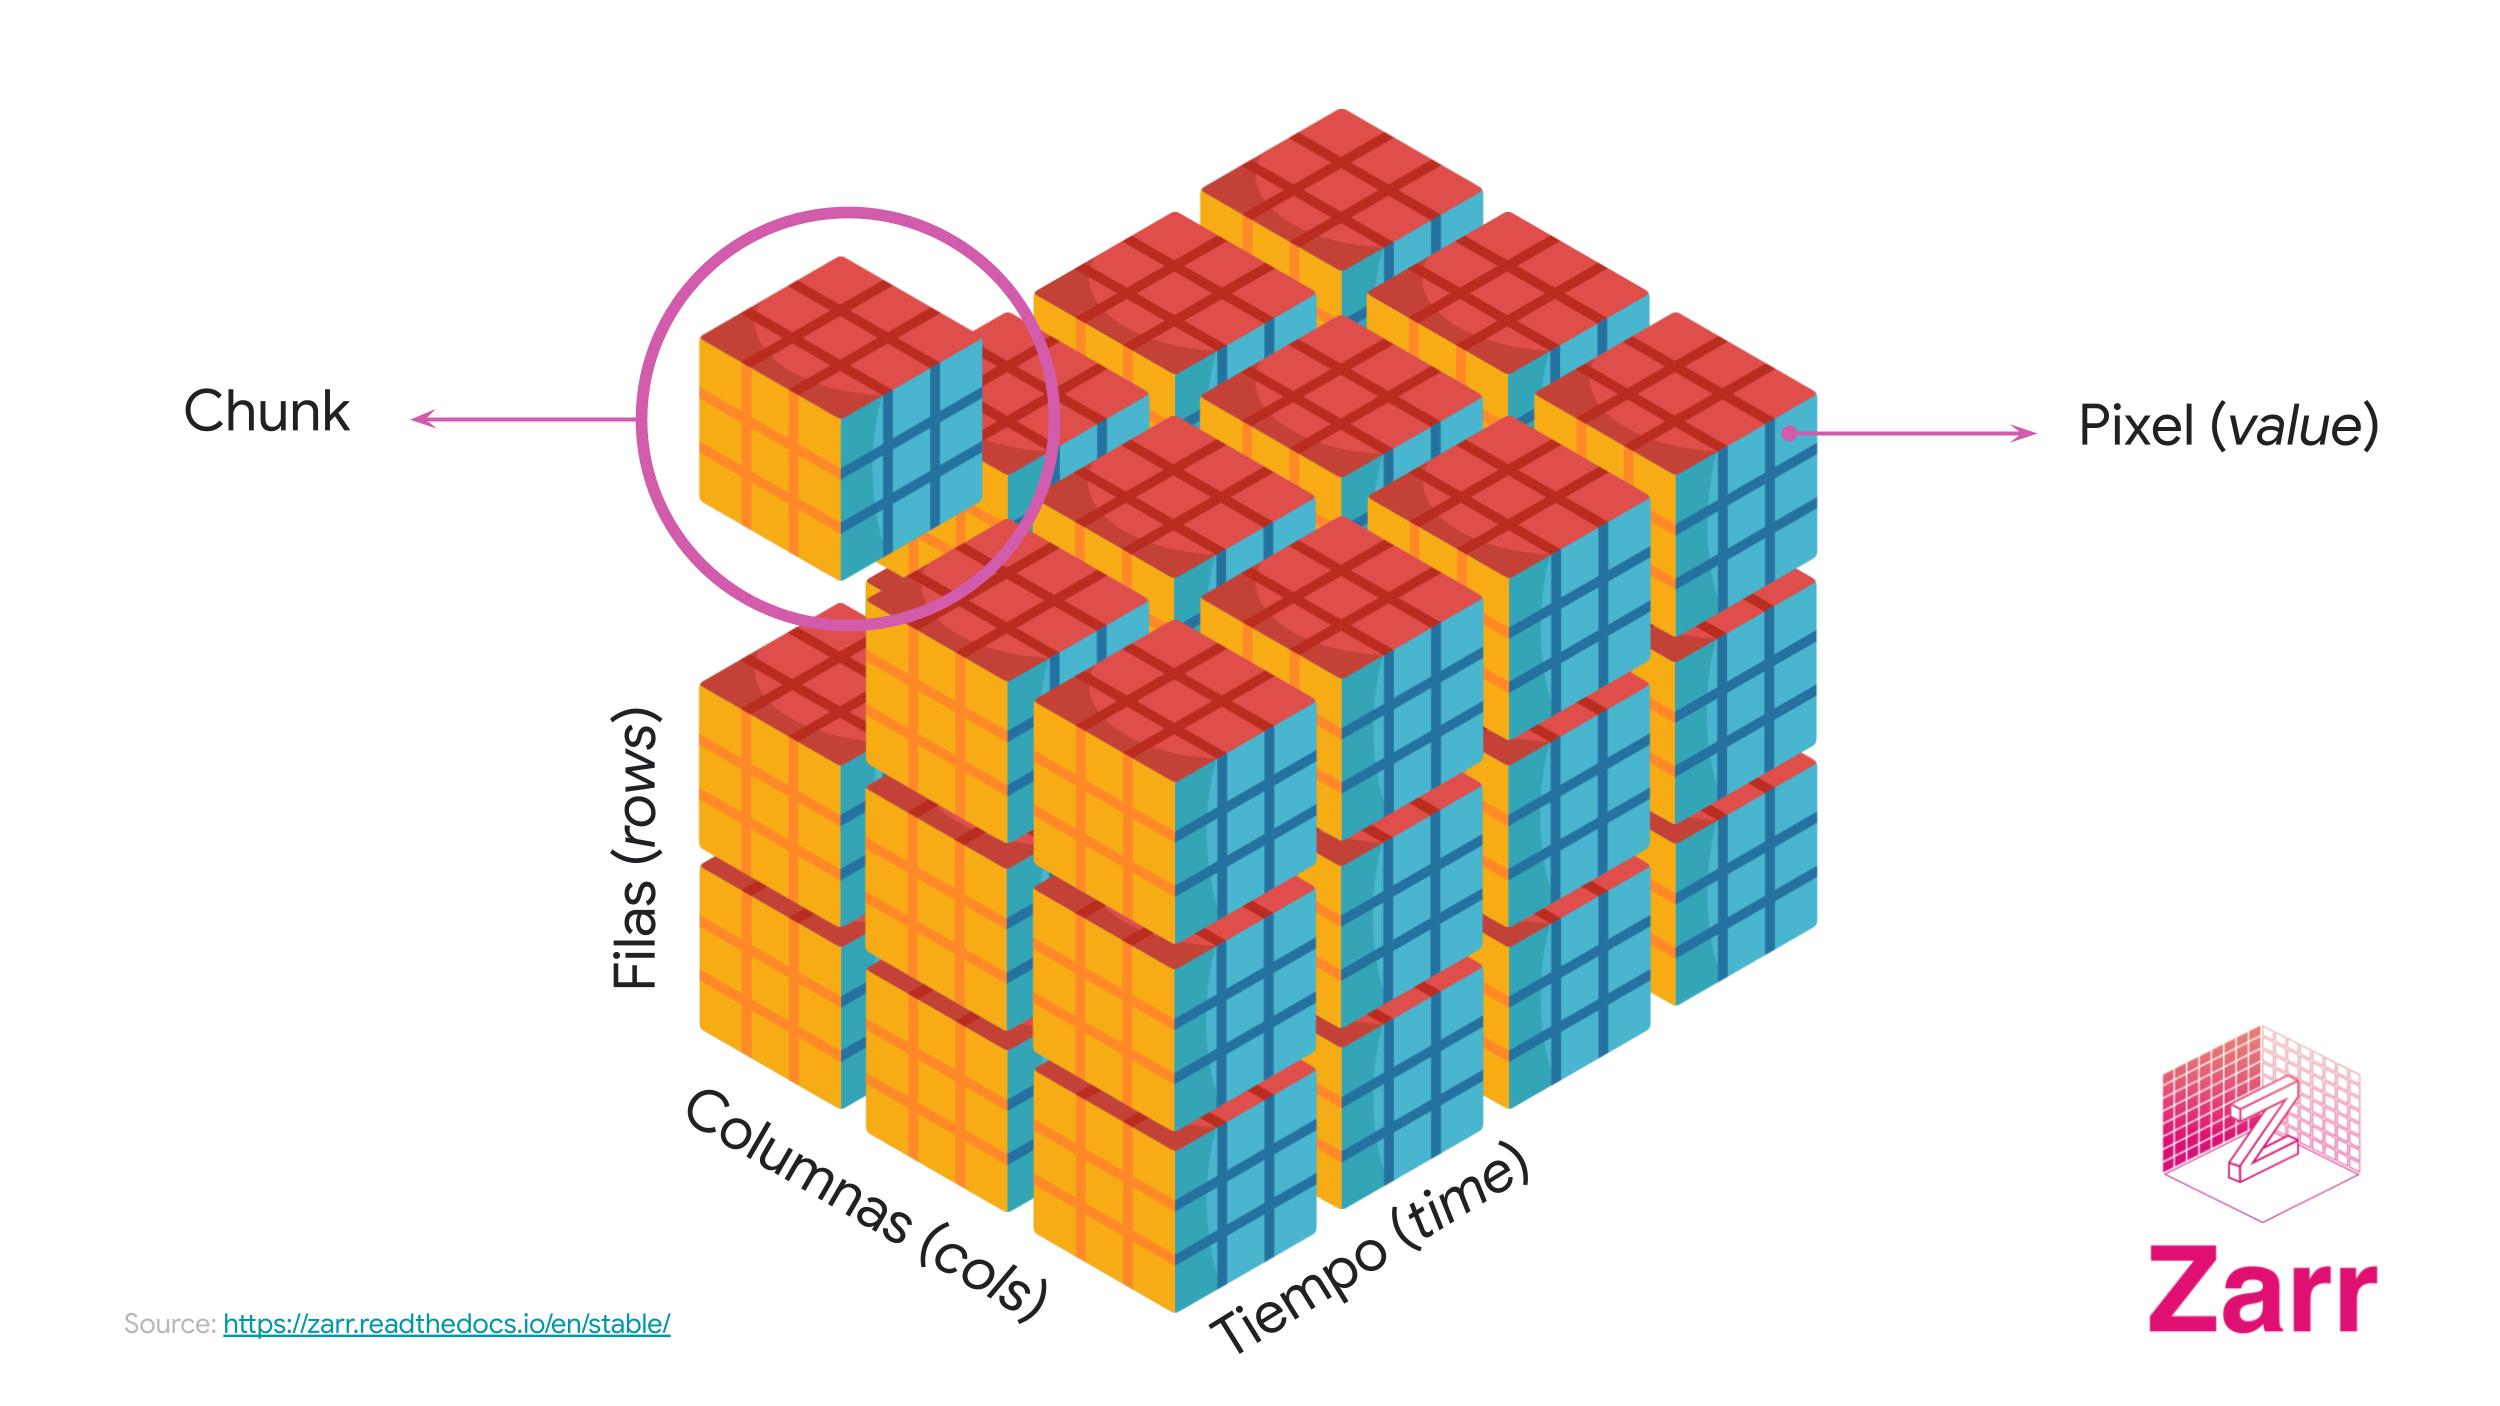

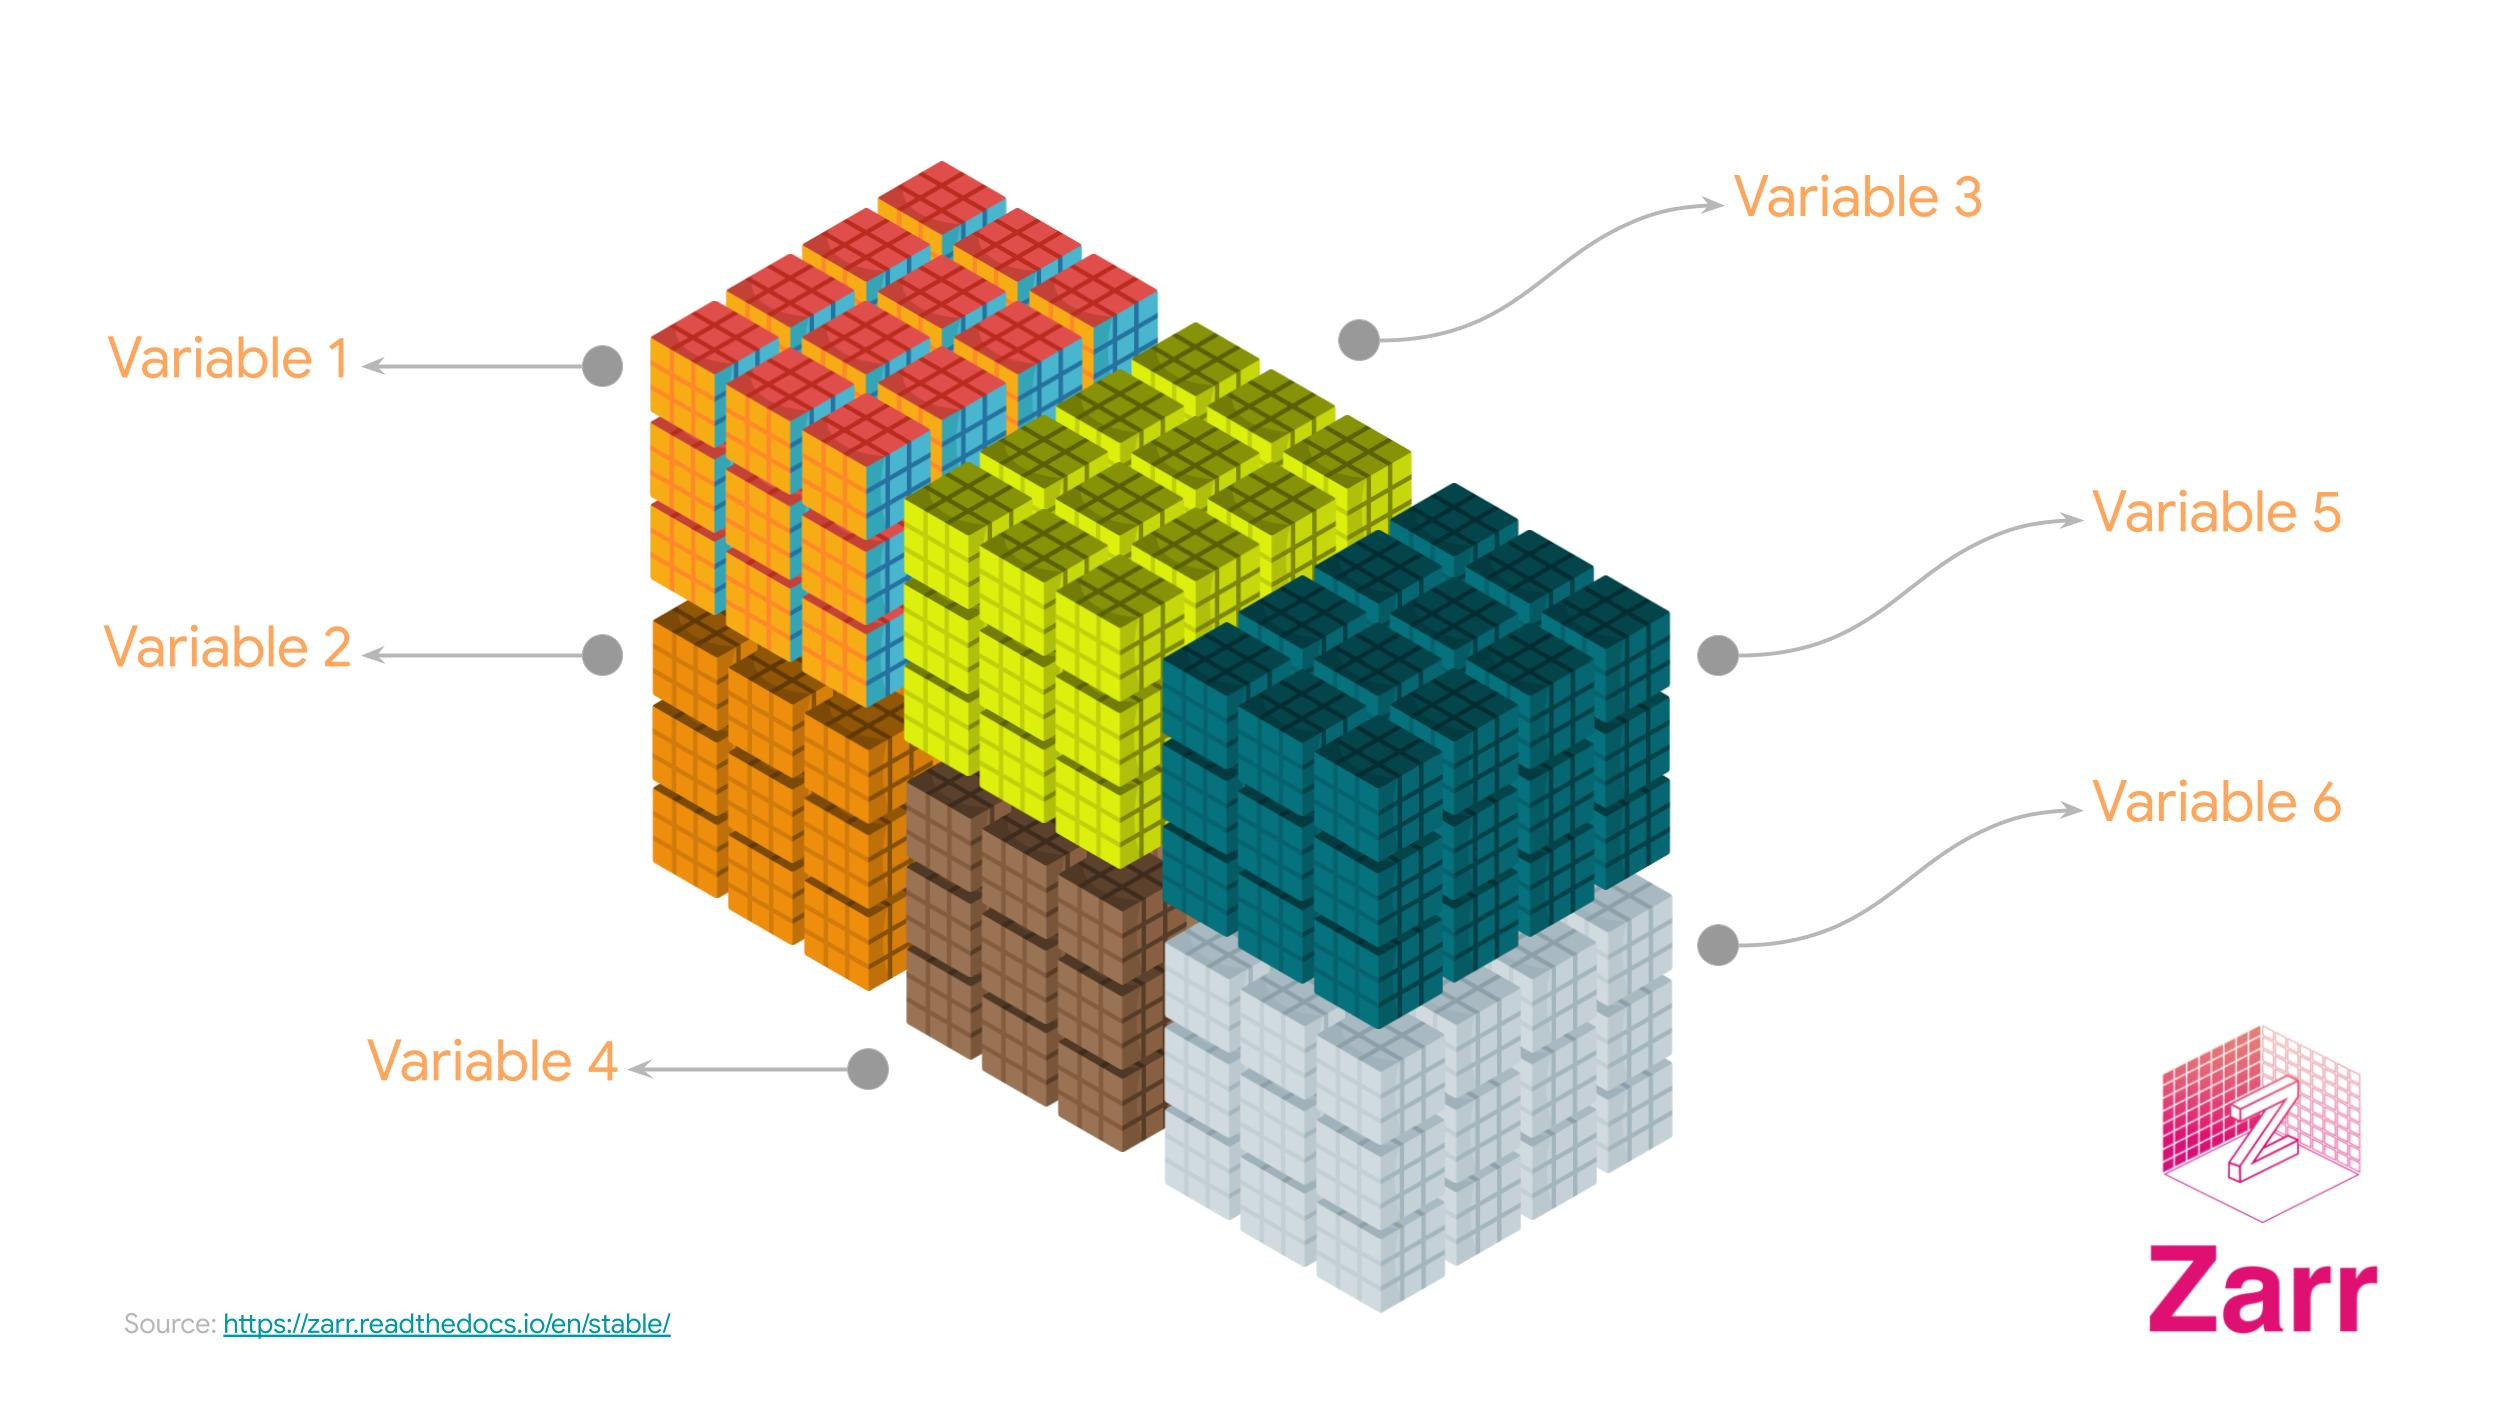

In [ ]:
bbox = [10.419167242485958, 51.07336379759111, 10.446133048445832, 51.08775544431788] # BBox inside Hainich

In [ ]:
data = odc.stac.load(
    items,
    bands=['B02','B03','B04','B08'],
    chunks=dict(x=512,y=512,time=-1),
    bbox=bbox,
    crs="EPSG:32632",
    resolution=10,
)

data#.chunk(dict(x=64,y=64,time=-1))

<xarray.Dataset>
Dimensions:      (y: 164, x: 193, time: 12)
Coordinates:
  * y            (y) float64 5.661e+06 5.661e+06 ... 5.659e+06 5.659e+06
  * x            (x) float64 5.994e+05 5.994e+05 ... 6.013e+05 6.013e+05
    spatial_ref  int32 32632
  * time         (time) datetime64[ns] 2018-06-01T10:20:24 ... 2018-06-29T10:...
Data variables:
    B02          (time, y, x) float32 dask.array<chunksize=(1, 164, 193), meta=np.ndarray>
    B03          (time, y, x) float32 dask.array<chunksize=(1, 164, 193), meta=np.ndarray>
    B04          (time, y, x) float32 dask.array<chunksize=(1, 164, 193), meta=np.ndarray>
    B08          (time, y, x) float32 dask.array<chunksize=(1, 164, 193), meta=np.ndarray>

Grafiquemos para verificar que todo está bien:

In [ ]:
def plot_rgb(ds, bands=['B04','B03','B02'], time_idx="2018-06-01", vmax=0.2):
    """Plots a False Color image."""
    
    da = ds[bands].to_array(dim='band').sel(time=time_idx, method="nearest") 
    da = da.transpose("x","y","band")
    da = ((da*0.0001)/vmax).clip(0,1)
    da.plot.imshow()

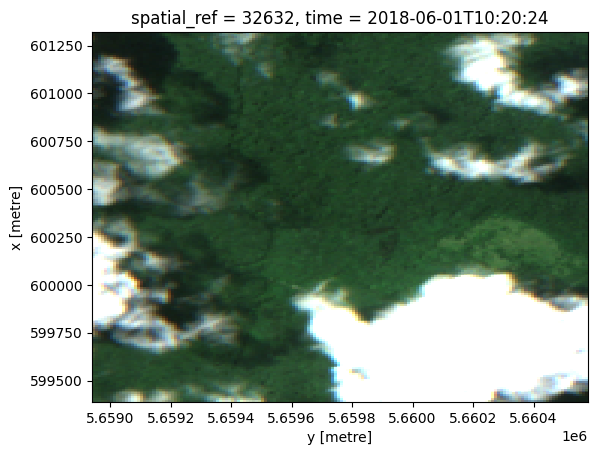

In [ ]:
plot_rgb(data)

## ¿Hay más datos EO disponibles?

Ahora que sabemos cómo manejar los Catálogos STAC y demás, podemos buscar nuestros datos favoritos desde un proveedor público de Catálogos STAC.

Veamos el Catálogo STAC público del Planetary Computer de Microsoft: [https://planetarycomputer.microsoft.com/catalog](https://planetarycomputer.microsoft.com/catalog)


In [ ]:
import planetary_computer as pc

In [ ]:
client = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")
print(f"{client.title}: {client.description}")

Microsoft Planetary Computer STAC API: Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer


Vamos a imprimir las colecciones en este catálogo.

**IMPORTANTE**: No todos los conjuntos de datos son públicos, comprueba el catálogo para obtener más información [https://planetarycomputer.microsoft.com/catalog](https://planetarycomputer.microsoft.com/catalog). Para acceder a todos ellos se requiere un TOKEN, debes registrarte para obtenerlo.


In [ ]:
collections = [collection for collection in client.get_collections()]
for idx, col in enumerate(collections):
    print(f"[{idx}] (id: {col.id}) {col.title}")

[0] (id: daymet-annual-pr) Daymet Annual Puerto Rico
[1] (id: daymet-daily-hi) Daymet Daily Hawaii
[2] (id: 3dep-seamless) USGS 3DEP Seamless DEMs
[3] (id: 3dep-lidar-dsm) USGS 3DEP Lidar Digital Surface Model
[4] (id: fia) Forest Inventory and Analysis
[5] (id: esa-worldcover) ESA WorldCover 2020
[6] (id: sentinel-1-rtc) Sentinel 1 Radiometrically Terrain Corrected (RTC)
[7] (id: gridmet) gridMET
[8] (id: daymet-annual-na) Daymet Annual North America
[9] (id: daymet-monthly-na) Daymet Monthly North America
[10] (id: daymet-annual-hi) Daymet Annual Hawaii
[11] (id: daymet-monthly-hi) Daymet Monthly Hawaii
[12] (id: daymet-monthly-pr) Daymet Monthly Puerto Rico
[13] (id: gnatsgo-tables) gNATSGO Soil Database - Tables
[14] (id: hgb) HGB: Harmonized Global Biomass for 2010
[15] (id: cop-dem-glo-30) Copernicus DEM GLO-30
[16] (id: cop-dem-glo-90) Copernicus DEM GLO-90
[17] (id: goes-cmi) GOES-R Cloud & Moisture Imagery
[18] (id: terraclimate) TerraClimate
[19] (id: nasa-nex-gddp-cmip6) Ear

Realicemos una búsqueda con nuestros parámetros anteriores para Sentinel-1 RTC.


In [ ]:
search = client.search(
    collections = "sentinel-1-grd",
    intersects = geom,
    datetime = "2018-06-01/2018-06-30",
)

items = list(search.get_items())

Los Items de Planetary Computer DEBEN ser firmados antes de ser usados. De lo contrario, se denegará el acceso.




In [ ]:
signed_items = [pc.sign(item) for item in items]

Los cargamos como un `xarray.Dataset`.

In [ ]:
data_s1 = odc.stac.load(
    signed_items,
    bands=['vv','vh'],
    chunks=dict(x=512,y=512,time=-1),
    bbox=bbox,
    crs="EPSG:32632",
    resolution=10,
)

data_s1

<xarray.Dataset>
Dimensions:      (y: 164, x: 193, time: 28)
Coordinates:
  * y            (y) float64 5.661e+06 5.661e+06 ... 5.659e+06 5.659e+06
  * x            (x) float64 5.994e+05 5.994e+05 ... 6.013e+05 6.013e+05
    spatial_ref  int32 32632
  * time         (time) datetime64[ns] 2018-06-01T17:00:00.886993 ... 2018-06...
Data variables:
    vv           (time, y, x) float32 dask.array<chunksize=(1, 164, 193), meta=np.ndarray>
    vh           (time, y, x) float32 dask.array<chunksize=(1, 164, 193), meta=np.ndarray>

Grafiquemos para verificar:



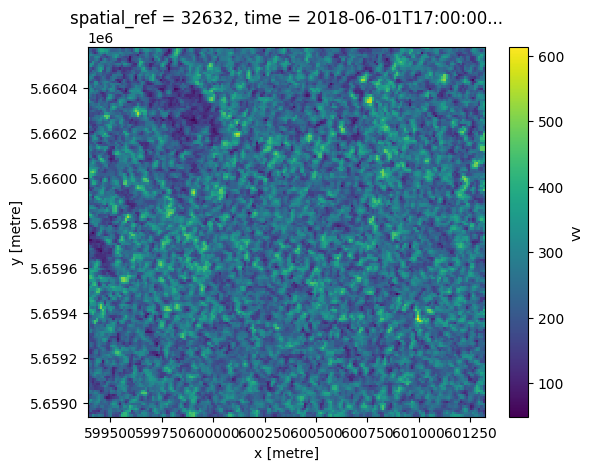

In [ ]:
data_s1.vv.isel(time=0).plot()

Ahora intentemos aplicar un filtro de mediana desde scipy:

In [ ]:
from scipy.ndimage import median_filter

Creemos una copia del dataset:

In [ ]:
data_s1_copy = data_s1

Y filtremos la imagen! Nota que el filtro utiliza un kernel en 3 dimensiones ya que el dataset tiene tres dimensiones:

In [ ]:
filtered_image_data = median_filter(data_s1.vv, size=(1, 5, 5))

In [ ]:
filtered_image_data

array([[[219., 220., 219., ..., 289., 276., 269.],
        [236., 236., 235., ..., 289., 289., 276.],
        [246., 246., 236., ..., 289., 283., 283.],
        ...,
        [195., 186., 195., ..., 219., 200., 199.],
        [195., 195., 195., ..., 232., 200., 200.],
        [164., 164., 177., ..., 232., 209., 200.]],

       [[259., 248., 248., ..., 211., 232., 272.],
        [259., 259., 264., ..., 211., 232., 272.],
        [259., 259., 261., ..., 214., 232., 242.],
        ...,
        [149., 150., 199., ..., 191., 189., 196.],
        [149., 150., 195., ..., 182., 189., 189.],
        [141., 142., 180., ..., 175., 189., 189.]],

       [[222., 233., 259., ..., 228., 192., 192.],
        [235., 254., 259., ..., 202., 192., 192.],
        [249., 254., 254., ..., 196., 192., 192.],
        ...,
        [234., 234., 232., ..., 182., 186., 186.],
        [260., 252., 232., ..., 152., 182., 166.],
        [266., 271., 236., ..., 182., 183., 183.]],

       ...,

       [[148., 177., 192

El dataset es retornado como un numpy array, así que debemos actualizar nuestro xarray dataset:

In [ ]:
data_s1_copy.vv.values = filtered_image_data

In [ ]:
data_s1_copy

<xarray.Dataset>
Dimensions:      (y: 164, x: 193, time: 28)
Coordinates:
  * y            (y) float64 5.661e+06 5.661e+06 ... 5.659e+06 5.659e+06
  * x            (x) float64 5.994e+05 5.994e+05 ... 6.013e+05 6.013e+05
    spatial_ref  int32 32632
  * time         (time) datetime64[ns] 2018-06-01T17:00:00.886993 ... 2018-06...
Data variables:
    vv           (time, y, x) float32 219.0 220.0 219.0 ... 226.0 226.0 268.0
    vh           (time, y, x) float32 dask.array<chunksize=(1, 164, 193), meta=np.ndarray>

Y ahora podemos visualizarlo!

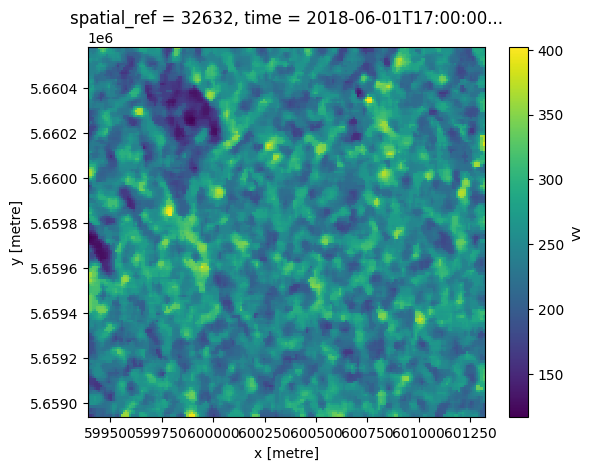

In [ ]:
data_s1_copy.vv.isel(time=0).plot()

## Vamos a probar un Catálogo STAC público (pero privado)

Vamos a revisar el Catálogo STAC de Google Earth Engine (GEE): [https://developers.google.com/earth-engine/datasets/catalog](https://developers.google.com/earth-engine/datasets/catalog). Este catálogo es público y lo podemos abrir con `pystac`, pero necesitamos trabajar con la API de Earth Engine para obtener los datos reales.


In [ ]:
client = Client.open("https://earthengine-stac.storage.googleapis.com/catalog/catalog.json")
print(f"{client.title}: {client.description}")

Google Earth Engine Catalog: The [Earth Engine](https://earthengine.google.com/) Public Data Catalog.

See also:

- [HTML version of the catalog](https://developers.google.com/earth-engine/datasets/catalog)
- [STAC Browser version](https://radiantearth.github.io/stac-browser/#/external/storage.googleapis.com/earthengine-stac/catalog/catalog.json)



To use the GEE API, we need to authenticate.

In [ ]:
import ee

ee.Authenticate()
ee.Initialize()

En GEE usaremos los siguientes objetos de la API:

- **ee.ImageCollection**: Almacena una colección STAC.
- **ee.Image**: Almacena un objeto STAC Item (raster) o un objeto STAC Asset (raster).
- **ee.Feature**: Almacena un objeto STAC Item (vector).
- **ee.Geometry**: Almacena una geometría.


Hagamos un search de Landsat-9.

Aquí necesitamos que todo esté almacenado en objetos de GEE, incluso las geometrías.





In [ ]:
geom = ee.Geometry.Point([10.434102660958201, 51.08111585538142]) # Hainich

El siguiente fragmento de código es equivalente al método search en pystac.

In [ ]:
l9 = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
    .filterBounds(geom) \
    .filterDate("2022-01-01","2022-02-01")

Veamos los resultados:

In [ ]:
import eerepr

In [ ]:
l9